In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import tree


from sklearn.model_selection import GridSearchCV

import graphviz
#!conda install --yes python-graphviz
#!conda install --yes graphviz

import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [558]:
train_data = pd.read_csv("train.csv", index_col=None, header=0,na_values=('?',''))

In [559]:
test_data = pd.read_csv("test.csv", index_col=None, header=0,na_values=('?',''))

In [560]:
train_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [561]:
train_data.shape

(137, 43)

In [562]:
test_data.shape

(100000, 42)

In [563]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [564]:
train_data.describe(include='all')

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137,137,137,137,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
unique,NaN,134,34,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01/07/2000,İstanbul,Big Cities,FC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,78,76,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68.000000,NaN,NaN,NaN,NaN,4.014599,4.408759,4.317518,4.372263,2.007299,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,NaN,NaN,NaN,NaN,2.910391,1.514900,1.032337,1.016462,1.209620,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,4.000000,4.000000,1.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,NaN,NaN,NaN,NaN,3.000000,5.000000,4.000000,4.000000,2.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,NaN,NaN,NaN,NaN,4.000000,5.000000,5.000000,5.000000,2.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06


In [565]:
train_data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [566]:
train_data.nunique(axis=0)

Id            137
Open Date     134
City           34
City Group      2
Type            3
P1              8
P2              8
P3              8
P4              6
P5              7
P6              8
P7              6
P8              8
P9              4
P10             4
P11             8
P12             7
P13             5
P14            10
P15             8
P16             9
P17             9
P18             7
P19             9
P20             9
P21             8
P22             5
P23             9
P24             9
P25             8
P26            10
P27             9
P28             9
P29             7
P30             9
P31            10
P32            10
P33             6
P34             8
P35             8
P36             8
P37             8
revenue       137
dtype: int64

In [567]:
test_data.drop("Id",axis=1,inplace=True)

In [568]:
train_data.drop("Id",axis=1,inplace=True)

In [569]:
train_data.corr()   #directly can see multicollinearity

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
P1,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,0.765743,0.795885,...,0.586532,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.070217
P2,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,0.481635,0.498135,...,0.322511,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.191518
P3,0.695928,0.473551,1.000000,0.443606,0.168891,0.570486,0.651489,0.689173,0.741967,0.764191,...,0.571525,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,-0.024613
P4,0.677941,0.540322,0.443606,1.000000,0.715406,0.595724,0.700482,0.654594,0.675336,0.685416,...,0.452364,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,0.035685
P5,0.302820,0.203003,0.168891,0.715406,1.000000,0.326524,0.446154,0.447577,0.465662,0.462299,...,0.306904,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,-0.028191
P6,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,0.738388,0.720144,0.676323,0.654594,...,0.563415,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594,0.139094
P7,0.853753,0.769842,0.651489,0.700482,0.446154,0.738388,1.000000,0.751196,0.775003,0.775642,...,0.584071,0.509213,0.452471,0.531011,0.339178,0.562561,0.457721,0.543563,0.309678,0.051165
P8,0.760820,0.505116,0.689173,0.654594,0.447577,0.720144,0.751196,1.000000,0.919956,0.881650,...,0.754736,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294,-0.084215
P9,0.765743,0.481635,0.741967,0.675336,0.465662,0.676323,0.775003,0.919956,1.000000,0.961266,...,0.789784,0.502670,0.467334,0.544749,0.326869,0.582042,0.467916,0.551953,0.330927,-0.050352
P10,0.795885,0.498135,0.764191,0.685416,0.462299,0.654594,0.775642,0.881650,0.961266,1.000000,...,0.789510,0.514738,0.462235,0.549238,0.320317,0.601956,0.483010,0.565068,0.313748,-0.073220


<IPython.core.display.Javascript object>


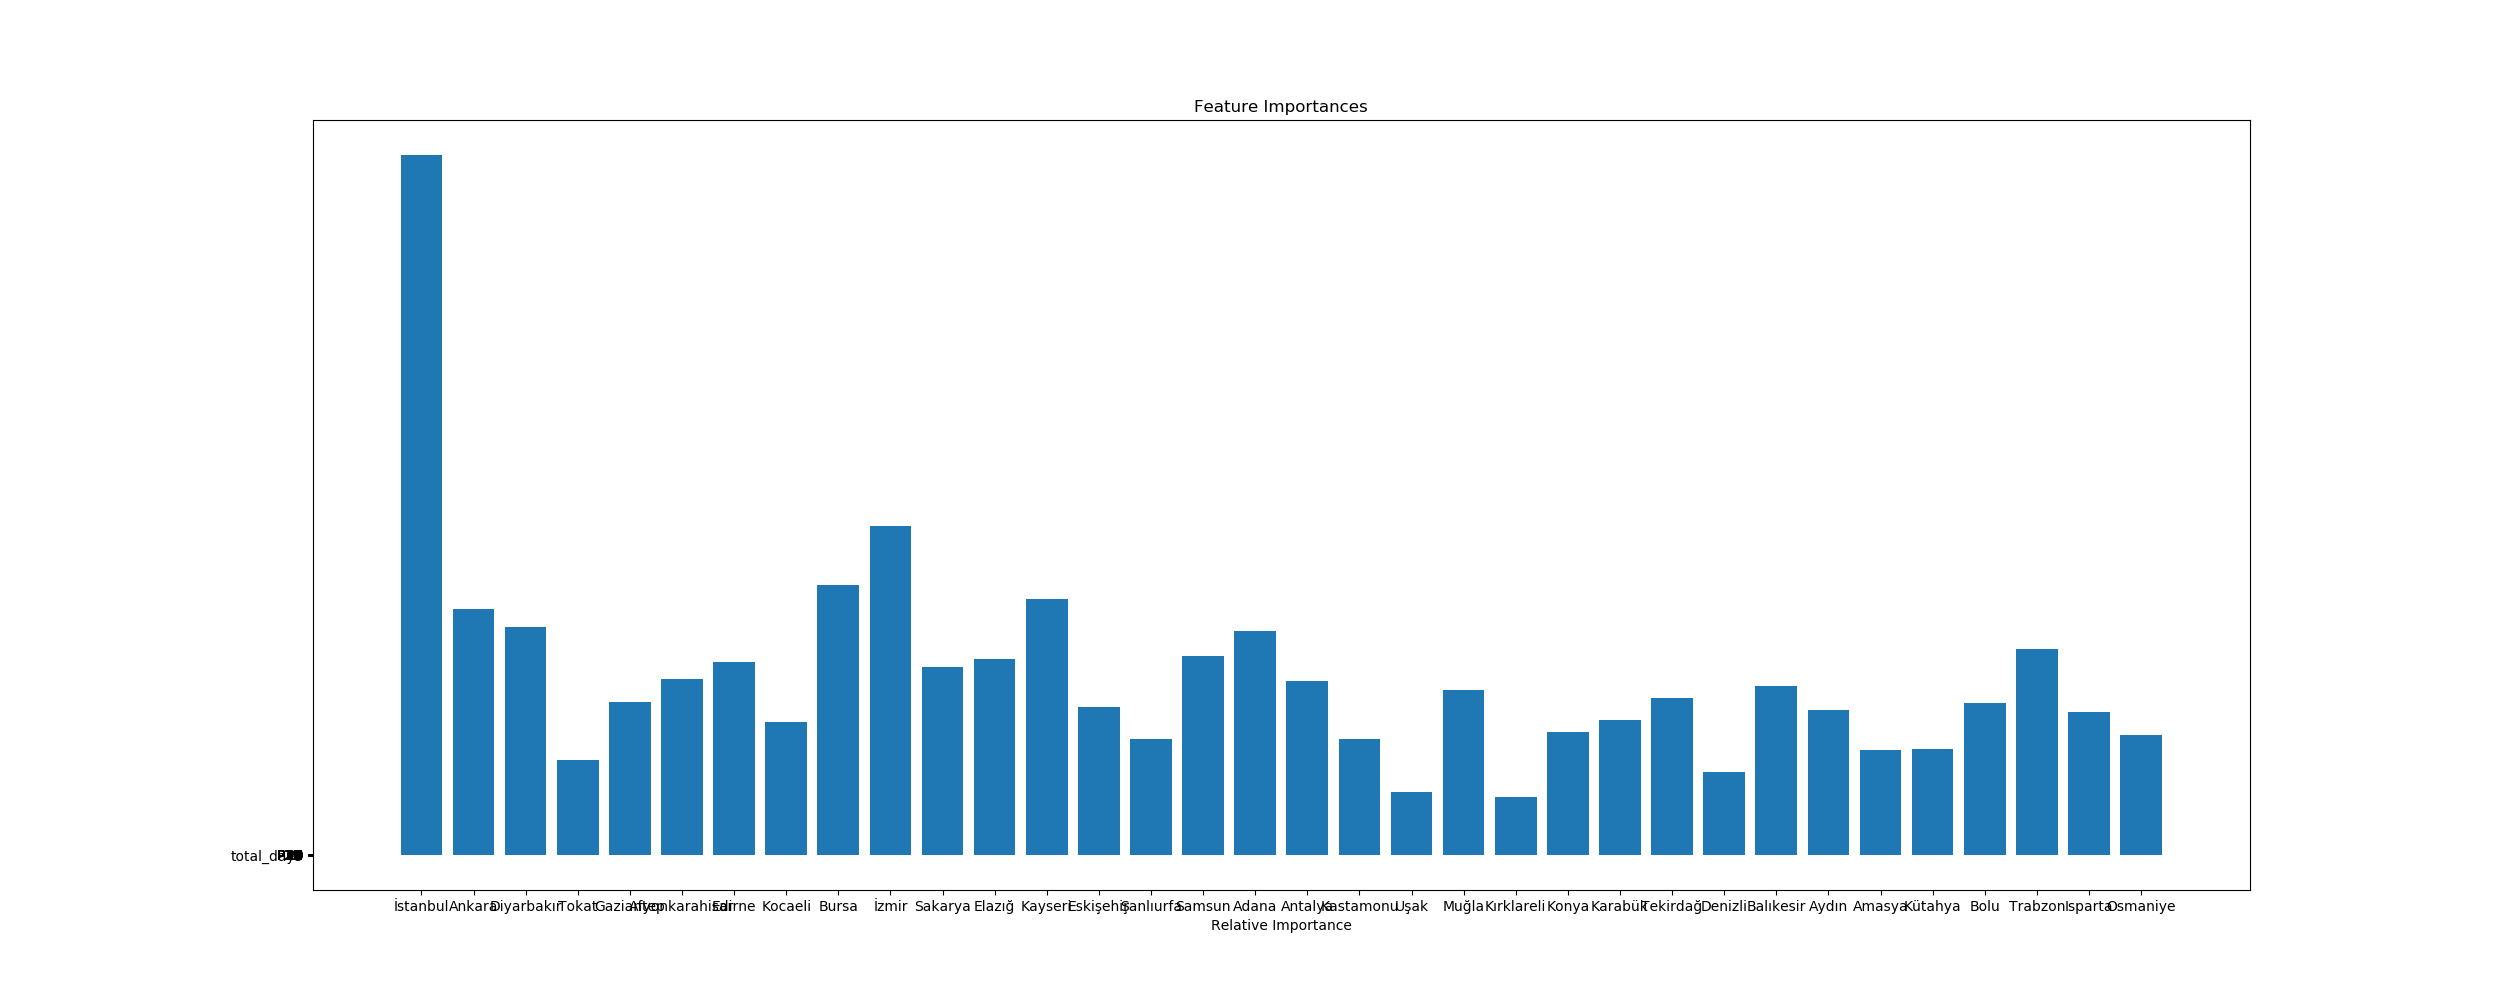

In [570]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(train_data.City,train_data.revenue)
plt.show()

# Visualisation

In [378]:
!pip install plotly

In [379]:
import matplotlib.pyplot as plt

import pandas as pd  #for dataframe operations-
import numpy as np  #for numpy array
import seaborn as sns  #plotting

import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

%matplotlib notebook

In [380]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\91989\anaconda3\lib\site-packages (4.6.0)


In [381]:
plotly.__version__

'4.6.0'

In [25]:
init_notebook_mode(connected=True)

In [26]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

In [27]:
def plot_bar(col_name):
    # create a table with value counts
    temp = train_data[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index.astype(str), # x axis values
            y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)
    

In [28]:
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [29]:
plot_bar('Open Date')

In [31]:
plot_bar('City')

In [33]:
plot_bar('City Group')

In [34]:
plot_bar('Type')

In [35]:
plot_bar('revenue')

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
Open Date     137 non-null datetime64[ns]
City          137 non-null category
City Group    137 non-null category
Type          137 non-null category
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-null int64
P23        

# change variables to required format

In [571]:
for col in ['City', 'City Group', 'Type']:
    train_data[col] = train_data[col].astype('category')

In [572]:
for col in ['City', 'City Group', 'Type']:
    test_data[col] = test_data[col].astype('category')

In [573]:
train_data["Open Date"]= pd.to_datetime(train_data["Open Date"]) 

In [574]:
test_data["Open Date"]= pd.to_datetime(test_data["Open Date"]) 

In [575]:
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


# Feature engineering

In [576]:
train_data['current_data']= pd.to_datetime('2020-04-20')

In [577]:
train_data["total_days"]=train_data['current_data'].sub(train_data['Open Date'], axis=0)

In [578]:
train_data["total_days"] = train_data["total_days"] / np.timedelta64(1, 'D')

In [579]:
train_data.drop("current_data",axis=1,inplace=True)
train_data.drop("Open Date",axis=1,inplace=True)


In [580]:
test_data['current_data']= pd.to_datetime('2020-04-20')

In [581]:
test_data["total_days"]=test_data['current_data'].sub(test_data['Open Date'], axis=0)

In [582]:
test_data["total_days"] = test_data["total_days"] / np.timedelta64(1, 'D')

In [583]:
test_data.drop("current_data",axis=1,inplace=True)
test_data.drop("Open Date",axis=1,inplace=True)


In [54]:
data = [go.Scatter(x=train_data.total_days,      # can see positive relation between revenue and restaurant's age
                   y=train_data.revenue,
                   
                   marker = dict(color = 'rgba(17, 157, 255, 0.6)', size = 10),
                   
                   mode = 'markers')]

layout = go.Layout(title = 'Scatter plot')
fig = go.Figure(data= data,layout=layout)
iplot(fig)

# check multicollinearity and outliers

In [584]:
cat_attr=list(train_data.select_dtypes("category").columns)

num_attr=list(train_data.columns.difference(cat_attr))


In [396]:
cat_attr_test=list(test_data.select_dtypes("category").columns)

In [397]:
from statsmodels.tools.tools import add_constant
X = add_constant(train_data)

In [398]:
num_attr_vif=num_attr
num_attr_vif.insert(0, "const")

In [399]:
type(num_attr_vif)

list

In [400]:
X.head()

,const,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,total_days
0,1.0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,5,3,4,5,5,4,3,4,5653753.0,7583.0
1,1.0,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,6923131.0,4449.0
2,1.0,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,0,0,2055379.0,2599.0
3,1.0,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,25,12,10,6,18,12,12,6,2675511.0,3000.0
4,1.0,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,5,1,3,2,3,4,3,3,4316715.0,3999.0


In [401]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X[num_attr_vif].values, i) for i in range(X[num_attr_vif].shape[1])]
vif["features"] = X[num_attr_vif].columns

In [402]:
vif.head()

,VIF_Factor,features
0,447.960065,const
1,23.117726,P1
2,193.812093,P10
3,6.868811,P11
4,36.036426,P12


In [234]:
 def calculate_vif(X, thresh):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X.columns

In [235]:
calculate_vif(X[num_attr_vif],10)

Dropping const with vif=447.9600646975288
Dropping P10 with vif=953.579820593244
Dropping P9 with vif=593.5598604771649
Dropping P36 with vif=237.51119859446837
Dropping P13 with vif=139.01667951685207
Dropping P8 with vif=135.65785643715074
Dropping P16 with vif=95.6019321698677
Dropping P4 with vif=78.03050150246982
Dropping P26 with vif=65.45605159057419
Dropping P1 with vif=58.16503578988896
Dropping P7 with vif=48.87594940839767
Dropping P12 with vif=44.50637750369515
Dropping P34 with vif=42.54036082626277
Dropping P18 with vif=33.80590747239877
Dropping P25 with vif=26.177487532326754
Dropping P2 with vif=26.063522115148597
Dropping P3 with vif=24.52243979942918
Dropping P28 with vif=22.673496852045712
Dropping P32 with vif=18.633915536463064
Dropping P20 with vif=17.076575525661003
Dropping P35 with vif=13.855105729425329
Dropping P14 with vif=12.91147403315784


Index(['P11', 'P15', 'P17', 'P19', 'P21', 'P22', 'P23', 'P24', 'P27', 'P29',
       'P30', 'P31', 'P33', 'P37', 'P5', 'P6', 'revenue', 'total_days'],
      dtype='object')

In [638]:
train_data = train_data[['City','City Group','Type','P11', 'P15', 'P17', 'P19', 'P21', 'P22', 'P23', 'P24', 'P27', 'P29',
       'P30', 'P31', 'P33', 'P37', 'P5', 'P6', 'revenue', 'total_days']].copy()

In [639]:
train_data.head()

,City,City Group,Type,P11,P15,P17,P19,P21,P22,P23,...,P27,P29,P30,P31,P33,P37,P5,P6,revenue,total_days
0,İstanbul,Big Cities,IL,3,2,2,5,1,3,3,...,4.0,3.0,5,3,5,4,2,2,5653753.0,7583.0
1,Ankara,Big Cities,FC,1,0,0,3,1,3,2,...,0.0,3.0,0,0,0,0,1,2,6923131.0,4449.0
2,Diyarbakır,Other,IL,2,0,0,1,1,1,1,...,0.0,3.0,0,0,0,0,2,3,2055379.0,2599.0
3,Tokat,Other,IL,8,4,3,20,6,1,10,...,2.5,7.5,25,12,6,6,4,4,2675511.0,3000.0
4,Gaziantep,Other,IL,2,1,1,2,1,2,1,...,5.0,3.0,5,1,2,3,2,2,4316715.0,3999.0


In [640]:
median = train_data['revenue'].median()
std = train_data['revenue'].std()
outliers = (train_data['revenue'] - median).abs() > 3*std


In [641]:
train_data.loc[outliers,'revenue'] = np.nan

In [642]:
train_data.isnull().sum()

City          0
City Group    0
Type          0
P11           0
P15           0
P17           0
P19           0
P21           0
P22           0
P23           0
P24           0
P27           0
P29           0
P30           0
P31           0
P33           0
P37           0
P5            0
P6            0
revenue       3
total_days    0
dtype: int64

In [643]:
train_data['revenue'].fillna(median, inplace=True)

In [644]:
train_data.isnull().sum()

City          0
City Group    0
Type          0
P11           0
P15           0
P17           0
P19           0
P21           0
P22           0
P23           0
P24           0
P27           0
P29           0
P30           0
P31           0
P33           0
P37           0
P5            0
P6            0
revenue       0
total_days    0
dtype: int64

# dummification and onehot encoding

In [645]:
train_data.head(1)

,City,City Group,Type,P11,P15,P17,P19,P21,P22,P23,...,P27,P29,P30,P31,P33,P37,P5,P6,revenue,total_days
0,İstanbul,Big Cities,IL,3,2,2,5,1,3,3,...,4.0,3.0,5,3,5,4,2,2,5653753.0,7583.0


In [646]:
# generate binary values using get_dummies
#train_data_dummies = pd.get_dummies(train_data, columns=cat_attr,prefix=["City","CG","Type"])

In [647]:
test_data = test_data[['City','City Group','Type','P11', 'P15', 'P17', 'P19', 'P21', 'P22', 'P23', 'P24', 'P27', 'P29',
       'P30', 'P31', 'P33', 'P37', 'P5', 'P6', 'total_days']].copy()

In [648]:
# generate binary values using get_dummies
#test_data_dummies = pd.get_dummies(test_data, columns=cat_attr_test,prefix=["City","CG","Type"])

In [649]:
#train_data_dummies.head()

In [650]:
# creating instance of one-hot-encoder
#enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
#enc_df = pd.DataFrame(enc.fit_transform(train_data[cat_attr]).toarray())


In [651]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = enc.fit(train_data[cat_attr])


In [652]:
enc_df_trans=pd.DataFrame(enc_df.transform(train_data[cat_attr]).toarray())

In [653]:
test_data_enc=pd.DataFrame(enc_df.transform(test_data[cat_attr]).toarray())

In [654]:
# merge with main df bridge_df on key values
#train_data_enc = train_data.join(enc_df)
#train_data_enc.head()

In [655]:
# merge with main df bridge_df on key values
train_data_enc = train_data.join(enc_df_trans)
train_data_enc.head()

,City,City Group,Type,P11,P15,P17,P19,P21,P22,P23,...,29,30,31,32,33,34,35,36,37,38
0,İstanbul,Big Cities,IL,3,2,2,5,1,3,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Ankara,Big Cities,FC,1,0,0,3,1,3,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Diyarbakır,Other,IL,2,0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,Tokat,Other,IL,8,4,3,20,6,1,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Gaziantep,Other,IL,2,1,1,2,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [656]:
# merge with main df bridge_df on key values
test_data_enc = test_data.join(test_data_enc)
test_data_enc.head()

,City,City Group,Type,P11,P15,P17,P19,P21,P22,P23,...,29,30,31,32,33,34,35,36,37,38
0,Niğde,Other,FC,5,0,2,5,3,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Konya,Other,IL,2,0,0,5,3,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,Ankara,Big Cities,FC,4,0,0,5,5,5,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Kocaeli,Other,IL,3,0,0,4,3,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Afyonkarahisar,Other,FC,3,0,0,1,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [657]:
train_data_enc.drop("City",axis=1,inplace=True)
train_data_enc.drop("City Group",axis=1,inplace=True)
train_data_enc.drop("Type",axis=1,inplace=True)

In [658]:
test_data_enc.drop("City",axis=1,inplace=True)
test_data_enc.drop("City Group",axis=1,inplace=True)
test_data_enc.drop("Type",axis=1,inplace=True)

In [659]:
train_data_enc.head()

,P11,P15,P17,P19,P21,P22,P23,P24,P27,P29,...,29,30,31,32,33,34,35,36,37,38
0,3,2,2,5,1,3,3,1,4.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0,0,3,1,3,2,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,0,0,1,1,1,1,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,8,4,3,20,6,1,10,2,2.5,7.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2,1,1,2,1,2,1,2,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [660]:
test_data_enc.head()

,P11,P15,P17,P19,P21,P22,P23,P24,P27,P29,...,29,30,31,32,33,34,35,36,37,38
0,5,0,2,5,3,1,4,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,0,0,5,3,2,1,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,4,0,0,5,5,5,5,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,0,0,4,3,2,2,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3,0,0,1,3,1,1,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [661]:
train_data_new=train_data_enc.sample(frac=0.7,random_state=200) #random state is a seed value
val_data=train_data_enc.drop(train_data_new.index)


In [662]:
train_data_new_dummies=train_data_dummies.sample(frac=0.7,random_state=200) #random state is a seed value
val_data_dummies=train_data_dummies.drop(train_data_new_dummies.index)


In [663]:
train_data_new.shape

(96, 57)

In [664]:
#Performing train val split on the data
X_train, y_train = train_data_new.loc[:,train_data_new.columns!='revenue'], train_data_new.loc[:,'revenue']

X_val, y_val = val_data.loc[:,val_data.columns!='revenue'], val_data.loc[:,'revenue']

In [665]:
#Performing train val split on the data
X_train_dummies, y_train_dummies = train_data_new_dummies.loc[:,train_data_new_dummies.columns!='revenue'], train_data_new_dummies.loc[:,'revenue']

X_val_dummmies, y_val_dummies = val_data_dummies.loc[:,val_data_dummies.columns!='revenue'], val_data_dummies.loc[:,'revenue']

In [666]:
X_train.head()

,P11,P15,P17,P19,P21,P22,P23,P24,P27,P29,...,29,30,31,32,33,34,35,36,37,38
19,1,0,0,2,1,1,1,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,0,0,1,1,1,1,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
128,1,0,0,1,1,1,1,0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
90,4,0,0,15,3,3,5,0,0.0,7.5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
124,2,0,0,1,2,1,2,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [517]:
import statsmodels.api as sm
# Note the difference in argument order
linear_model = sm.OLS(y_train, X_train).fit()
## make the predictions by the model

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                 -0.097
Method:                 Least Squares   F-statistic:                    0.8217
Date:                Wed, 29 Apr 2020   Prob (F-statistic):              0.749
Time:                        02:04:22   Log-Likelihood:                -1489.6
No. Observations:                  96   AIC:                             3075.
Df Residuals:                      48   BIC:                             3198.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
P11         2.944e+04   2.17e+05      0.136      0.892   -4.06e+05    4.65e+05
P15        -2.237e+05   3.59e+05     -0.622      0.537   -9.46e+05    4.99e+05
P17         1.792e+05   2.86e+05      0.627      0.533   -3.95e+05    7.53e+05
P19        -4.506e+04    1.3e+05     -0.346      0.731   -3.07e+05    2.17e+05
P21         6.528e+04   3.47e+05      0.188      0.851   -6.32e+05    7.63e+05
P22        -2.962e+05    2.5e+05     -1.183      0.243      -8e+05    2.07e+05
P23         1.361e+05   1.13e+05      1.205      0.234    -9.1e+04    3.63e+05
P24        -9.865e+04   2.78e+05     -0.355      0.724   -6.57e+05     4.6e+05
P27        -1.199e+05   2.82e+05     -0.425      0.672   -6.86e+05    4.47e+05
P29         2.719e+04   2.26e+05      0.120      0.905   -4.28e+05    4.82e+05
P30        -1.022e+05   1.12e+05     -0.909      0.368   -3.28e+05    1.24e+05
P31         -4.17e+04   2.04e+05     -0.204      0.839   -4.53e+05    3.69e+05
P33         4.815e+05   3.95e+05      1.219      0.229   -3.13e+05    1.28e+06
P37         2.031e+05   3.94e+05      0.515      0.609    -5.9e+05    9.96e+05
P5          2.313e+05    2.9e+05      0.799      0.428   -3.51e+05    8.14e+05
P6         -1.096e+04   1.96e+05     -0.056      0.956   -4.04e+05    3.83e+05
total_days    44.5214    182.399      0.244      0.808    -322.217     411.259
0           1.417e+06   2.09e+06      0.679      0.500   -2.78e+06    5.61e+06
1            9.91e+05   2.28e+06      0.435      0.666   -3.59e+06    5.58e+06
2           7.248e-09   7.17e-09      1.011      0.317   -7.17e-09    2.17e-08
3          -1.018e+06   6.03e+05     -1.687      0.098   -2.23e+06    1.95e+05
4           -7.69e+05   1.41e+06     -0.546      0.587    -3.6e+06    2.06e+06
5           4.891e-10   4.98e-09      0.098      0.922   -9.53e-09    1.05e-08
6          -9.924e+05   2.62e+06     -0.378      0.707   -6.27e+06    4.29e+06
7           7.266e+05   1.89e+06      0.384      0.703   -3.08e+06    4.53e+06
8           2.174e+06   1.44e+06      1.507      0.138   -7.26e+05    5.07e+06
9          -5.684e+05   2.09e+06     -0.272      0.787   -4.77e+06    3.63e+06
10            2.9e+05   1.21e+06      0.241      0.811   -2.13e+06    2.71e+06
11          1.242e+06   3.02e+06      0.411      0.683   -4.83e+06    7.31e+06
12         -5.597e-11   3.96e-09     -0.014      0.989   -8.02e-09     7.9e-09
13          1.259e+06   1.42e+06      0.884      0.381    -1.6e+06    4.12e+06
14            1.4e+06   2.07e+06      0.676      0.502   -2.76e+06    5.56e+06
15          2.833e+05   2.11e+06      0.134      0.894   -3.96e+06    4.52e+06
16          2.277e+05   1.96e+06      0.116      0.908   -3.71e+06    4.16e+06
17         -4.876e-10   9.48e-10     -0.514      0.609   -2.39e-09    1.42e-09
18          3.515e+06   1.89e+06      1.859      0.069   -2.87e+05    7.32e+06
19

In [518]:
pred_train = linear_model.predict(X_train) 

In [519]:
pred_val = linear_model.predict(X_val) 

In [520]:
pred_test = linear_model.predict(test_data_enc) 

In [521]:
pred_test.shape

(100000,)

In [522]:
df = pd.DataFrame(pred_test)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\INSOFE_Internship\TASK2\restaurantrevenue\lr2.csv')

In [523]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, pred_train)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1326532.596160


In [524]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_val, pred_val)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1870919.095195


In [525]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [526]:
mean_absolute_percentage_error(y_train, pred_train)

26.908303246306886

In [527]:
mean_absolute_percentage_error(y_val, pred_val)

42.63306651901612

In [65]:
import statsmodels.api as sm
# Note the difference in argument order
linear_model_dummies = sm.OLS(y_train_dummies, X_train_dummies).fit()
## make the predictions by the model

linear_model_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1.245
Date:                Tue, 28 Apr 2020   Prob (F-statistic):              0.268
Time:                        23:00:37   Log-Likelihood:                -1449.8
No. Observations:                  96   AIC:                             3038.
Df Residuals:                      27   BIC:                             3215.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
P1                   2.255e+04   4.58e+05      0.049      0.961   -9.18e+05    9.63e+05
P2                   -3.77e+05   4.95e+05     -0.762      0.453   -1.39e+06    6.38e+05
P3                   2.146e+06   9.43e+05      2.276      0.031    2.11e+05    4.08e+06
P4                  -1.389e+05   7.13e+05     -0.195      0.847    -1.6e+06    1.32e+06
P5                   4.344e+05   5.74e+05      0.757      0.455   -7.42e+05    1.61e+06
P6                  -6.317e+04   3.14e+05     -0.201      0.842   -7.08e+05    5.82e+05
P7                  -2.855e+05   5.25e+05     -0.544      0.591   -1.36e+06    7.92e+05
P8                  -1.146e+06   7.31e+05     -1.567      0.129   -2.65e+06    3.54e+05
P9                  -2.493e+06   1.45e+06     -1.721      0.097   -5.46e+06    4.79e+05
P10                  2.101e+06   3.27e+06      0.643      0.526    -4.6e+06    8.81e+06
P11                 -1.058e+05   4.46e+05     -0.237      0.814   -1.02e+06     8.1e+05
P12                  2.244e+06   9.13e+05      2.459      0.021    3.72e+05    4.12e+06
P13                 -2.442e+06   3.39e+06     -0.721      0.477   -9.39e+06    4.51e+06
P14                 -1.764e+05   5.44e+05     -0.325      0.748   -1.29e+06    9.39e+05
P15                  1.749e+05   7.45e+05      0.235      0.816   -1.35e+06     1.7e+06
P16                 -9.081e+04   7.22e+05     -0.126      0.901   -1.57e+06    1.39e+06
P17                 -1.554e+05   4.09e+05     -0.380      0.707   -9.95e+05    6.84e+05
P18                 -3.036e+05   6.14e+05     -0.495      0.625   -1.56e+06    9.56e+05
P19                  7.402e+04   2.35e+05      0.315      0.755   -4.08e+05    5.56e+05
P20                 -6.319e+05   2.56e+05     -2.468      0.020   -1.16e+06   -1.07e+05
P21                  3.629e+05   5.09e+05      0.713      0.482   -6.82e+05    1.41e+06
P22                 -5.907e+05    3.6e+05     -1.640      0.113   -1.33e+06    1.48e+05
P23                 -2.038e+05   1.77e+05     -1.149      0.261   -5.68e+05     1.6e+05
P24                  1.073e+06   9.33e+05      1.150      0.260   -8.42e+05    2.99e+06
P25                  1.767e+06   7.71e+05      2.290      0.030    1.84e+05    3.35e+06
P26                 -2.985e+06   1.17e+06     -2.543      0.017   -5.39e+06   -5.77e+05
P27                  1.633e+05   3.35e+05      0.488      0.629   -5.23e+05     8.5e+05
P28                  1.003e+06   3.48e+05      2.882      0.008    2.89e+05    1.72e+06
P29                  4.209e+04   5.34e+05      0.079      0.938   -1.05e+06    1.14e+06
P30                 -1.397e+05   2.77e+05     -0.505      0.617   -7.07e+05    4.28e+05
P31                 -8.637e+04   5.71e+05     -0.151      0.881   -1.26e+06    1.09e+06
P32                  6.615e+05   5.53e+05      1.195      0.242   -4.74e+05     1.8e+06
P33

In [327]:
pred_train_dummies = linear_model_dummies.predict(X_train_dummies) 

In [328]:
pred_val_dummies = linear_model.predict(X_val_dummmies) 

In [329]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, pred_train_dummies)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 979133.186755


In [330]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_val, pred_val_dummies)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 8026144.223772


In [312]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [313]:
mean_absolute_percentage_error(y_train, pred_train_dummies)

18.137065904605496

In [331]:
mean_absolute_percentage_error(y_val, pred_val_dummies)

136.18297309173107

# Ridge   #because we saw multicollinearity

In [528]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV

In [529]:
#### TYPE
ridgeCV_model=RidgeCV(alphas=[0.1, 1.0, 10.0])

In [530]:
ridgeCV_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [531]:
ridgeCV_model.alpha_

10.0

In [532]:
np.round(ridgeCV_model.score(X_train,y_train)*100,2)  #r square

29.12

In [533]:
train_preds=ridgeCV_model.predict(X_train)

In [534]:
val_preds=ridgeCV_model.predict(X_val)

In [535]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1500260.229647


In [536]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_val, val_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1446535.527110


# Best model --saving it as pkl file

In [ ]:
# save the model to disk
filename = 'ridgeCV_model.sav'
pickle.dump(model, open(ridgeCV_model, 'wb'))

In [537]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [538]:
mean_absolute_percentage_error(y_train, train_preds)

34.13496405421774

In [539]:
mean_absolute_percentage_error(y_val, val_preds)

32.95645230049059

In [540]:
test_preds=ridgeCV_model.predict(test_data_enc) 

In [541]:
df = pd.DataFrame(test_preds)   #without multicollinearity columns
df.to_csv(r'C:\Users\91989\Documents\PYTHON\INSOFE_Internship\TASK2\restaurantrevenue\ridge3.csv')

# Lasso for variable selection


In [542]:
from sklearn.linear_model import LassoCV

In [543]:
#### TYPE
LassoCV_model=LassoCV()

In [545]:
LassoCV_model.fit(X_train,y_train)    #important feature does not make difference bcz lasso already do varialbe selection

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [546]:
LassoCV_model.alpha_

400282.89271202293

In [548]:
np.round(LassoCV_model.score(X_train,y_train)*100,2)  #r square

6.65

In [549]:
train_preds=LassoCV_model.predict(X_train)

In [550]:
val_preds=LassoCV_model.predict(X_val)

In [551]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1721747.871328


In [552]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_val, val_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1483591.225153


In [133]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [315]:
mean_absolute_percentage_error(y_train, train_preds)

39.896258994178275

In [316]:
mean_absolute_percentage_error(y_val, val_preds)

34.66862337991402

In [553]:
test_preds=LassoCV_model.predict(test_data_enc)

In [554]:
df = pd.DataFrame(test_preds)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\INSOFE_Internship\TASK2\restaurantrevenue\lasso2.csv')

# Decision tree for variable selection

In [431]:
from sklearn.tree import DecisionTreeRegressor

In [679]:
#### TYPE
dt_model=DecisionTreeRegressor()

In [680]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [681]:
train_preds=dt_model.predict(X_train)

In [682]:
val_preds=dt_model.predict(X_val)

In [683]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.000000


In [684]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_val, val_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2384801.766346


In [685]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [686]:
mean_absolute_percentage_error(y_train, train_preds)

0.0

In [687]:
mean_absolute_percentage_error(y_val, val_preds)

52.26731605139492

In [688]:
test_preds=dt_model.predict(test_data_enc)

In [342]:
df = pd.DataFrame(test_preds)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\INSOFE_Internship\TASK2\restaurantrevenue\dt1.csv')

# important features

In [689]:
features = X_train.columns
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,total_days,P22,P19,3.000000,34.000000,P21,P24,P5,18.00000,P27,...,5.0,6.0,7.0,20.0,11.0,12.0,14.0,15.0,16.0,0.0
1,0.281737,0.128715,0.0809225,0.078211,0.070419,0.0596666,0.0464977,0.0456204,0.03353,0.0274273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [690]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [692]:
select = indices[0:23]
select

array([16,  5,  3, 20, 51,  4,  7, 14, 35,  8, 49, 27, 25,  2, 15,  9, 10,
       13, 11,  0,  1, 26,  6], dtype=int64)

In [470]:
dt_model.fit(X_train.iloc[:,select],y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [471]:
train_preds=dt_model.predict(X_train.iloc[:,select])

In [472]:
val_preds=dt_model.predict(X_val.iloc[:,select])

In [473]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.000000


In [474]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_val, val_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2354297.794463


In [475]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [364]:
mean_absolute_percentage_error(y_train, train_preds)

0.0

In [339]:
mean_absolute_percentage_error(y_val, val_preds)

56.12869142807643

In [341]:
test_preds=dt_model.predict(test_data_enc)

In [342]:
df = pd.DataFrame(test_preds)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\INSOFE_Internship\TASK2\restaurantrevenue\dt1.csv')

# Random Forest with normal data

In [600]:
from sklearn.ensemble import RandomForestRegressor

In [632]:
#### TYPE
rf_model=RandomForestRegressor(n_estimators=10)


In [633]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [634]:
train_preds=rf_model.predict(X_train)

In [635]:
val_preds=rf_model.predict(X_val)

In [636]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 984384.618837


In [637]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_val, val_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 3170017.169136


# rf after removing multicollinearity

In [673]:
#### TYPE
rf_model=RandomForestRegressor(n_estimators=20)


In [674]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [675]:
train_preds=rf_model.predict(X_train)

In [676]:
val_preds=rf_model.predict(X_val)

In [677]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 648354.749991


In [678]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_val, val_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1759580.836907


In [699]:
test_preds=dt_model.predict(test_data_enc)

In [700]:
df = pd.DataFrame(test_preds)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\INSOFE_Internship\TASK2\restaurantrevenue\rf1.csv')

# rf after removing multicollinearity and with imp features

In [673]:
#### TYPE
rf_model=RandomForestRegressor(n_estimators=20)


In [693]:
rf_model.fit(X_train.iloc[:,select],y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [695]:
train_preds=rf_model.predict(X_train.iloc[:,select])

In [696]:
val_preds=rf_model.predict(X_val.iloc[:,select])

In [697]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 695108.649199


In [698]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_val, val_preds)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1735166.312907


# meta classifier(Stacking)

In [3]:
pred1=pd.read_csv('lasso1.csv')
pred2=pd.read_csv('lasso2.csv')
pred3=pd.read_csv('ridge1.csv')
pred4=pd.read_csv('ridge2.csv')
pred5=pd.read_csv('ridge3.csv')

In [4]:
frames = [pred1,pred2,pred3,pred4,pred5]
full_data = pd.concat(frames,axis=1)

In [5]:
full_data.head()

,Id,Prediction,Id,Prediction,Id,Prediction,Id,Prediction,Id,Prediction
0,0,4075868.325,0,4199414.207,0,3642989.645,0,4313880.458,0,4313880.458
1,1,3876920.438,1,4028701.604,1,2335815.097,1,2955305.486,1,2955305.486
2,2,3912336.152,2,4041397.856,2,2870332.804,2,3150406.685,2,3150406.685
3,3,3871931.729,3,3918431.657,3,3347146.337,3,3002839.922,3,3002839.922
4,4,4118568.233,4,3845470.975,4,4527001.337,4,3585829.711,4,3585829.711


In [7]:
full_data.drop("Id",axis=1,inplace=True)

In [8]:
full_data.head()

,Prediction,Prediction,Prediction,Prediction,Prediction
0,4075868.325,4199414.207,3642989.645,4313880.458,4313880.458
1,3876920.438,4028701.604,2335815.097,2955305.486,2955305.486
2,3912336.152,4041397.856,2870332.804,3150406.685,3150406.685
3,3871931.729,3918431.657,3347146.337,3002839.922,3002839.922
4,4118568.233,3845470.975,4527001.337,3585829.711,3585829.711


In [9]:
full_data.columns=['Prediction1','Prediction2','Prediction3','Prediction4','Prediction5']

In [10]:
full_data1=full_data.mean(axis=1)

In [11]:
full_data1.head()

0    4.109207e+06
1    3.230410e+06
2    3.424976e+06
3    3.428638e+06
4    3.932540e+06
dtype: float64

In [12]:
full_data1.shape

(100000,)

In [13]:

full_data1.to_csv(r'C:\Users\91989\Documents\PYTHON\INSOFE_Internship\TASK2\restaurantrevenue\full_data.csv')

C:\Users\91989\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
